## Overview
In this notebook I try to do some basic EDA and visualization.

To help myself seeing the problem more clear.
And try to find bugs more easily.


In [51]:
import model
from model import read_image
from model import columnIdx
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns
samples = model.GetSampleFullname()

# see the data structure of sample csv file.
# there are 7 columns, 
# first 3 columns are images file fullname of 3 different camera angels, center, left, right.
# 4th column is 'steering' angle.
# the last columns throttle, brake, speed seems to have no use yet?
for number in range(10):
    print(samples[number])


['center', 'left', 'right', 'steering', 'throttle', 'brake', 'speed']
['IMG/center_2016_12_01_13_30_48_287.jpg', ' IMG/left_2016_12_01_13_30_48_287.jpg', ' IMG/right_2016_12_01_13_30_48_287.jpg', ' 0', ' 0', ' 0', ' 22.14829']
['IMG/center_2016_12_01_13_30_48_404.jpg', ' IMG/left_2016_12_01_13_30_48_404.jpg', ' IMG/right_2016_12_01_13_30_48_404.jpg', ' 0', ' 0', ' 0', ' 21.87963']
['IMG/center_2016_12_01_13_31_12_937.jpg', ' IMG/left_2016_12_01_13_31_12_937.jpg', ' IMG/right_2016_12_01_13_31_12_937.jpg', ' 0', ' 0', ' 0', ' 1.453011']
['IMG/center_2016_12_01_13_31_13_037.jpg', ' IMG/left_2016_12_01_13_31_13_037.jpg', ' IMG/right_2016_12_01_13_31_13_037.jpg', ' 0', ' 0', ' 0', ' 1.438419']
['IMG/center_2016_12_01_13_31_13_177.jpg', ' IMG/left_2016_12_01_13_31_13_177.jpg', ' IMG/right_2016_12_01_13_31_13_177.jpg', ' 0', ' 0', ' 0', ' 1.418236']
['IMG/center_2016_12_01_13_31_13_279.jpg', ' IMG/left_2016_12_01_13_31_13_279.jpg', ' IMG/right_2016_12_01_13_31_13_279.jpg', ' 0', ' 0', ' 0', '

IMG/center_2016_12_01_13_31_13_686.jpg
steering angle :   0
name :  ./pics/center_2016_12_01_13_31_13_786.jpg


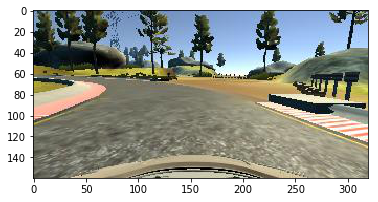

name :  ./pics/left_2016_12_01_13_31_13_786.jpg


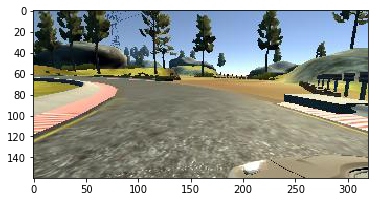

name :  ./pics/right_2016_12_01_13_31_13_786.jpg


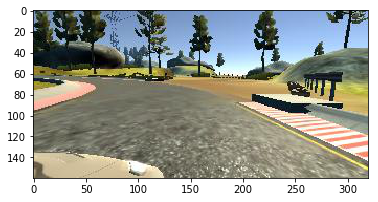

In [52]:

# just pick a sample, like 10th.
sample_idx = 10
print( samples[sample_idx][columnIdx.center.value] )

# try to show the 3 camera images.
angle = samples[sample_idx][columnIdx.steering.value]
print('steering angle : ', angle)

'''
# left image.
name = './' + model.traintag + samples[1][columnIdx.center.value].strip().split('\\')[-1]
print('name : ', name)
# remember the read_image RETURNS A TUPLE, not only a image.
img, angle = read_image(name, angle, columnIdx.center.value)
#img = np.array(img)
#print('shape: ', img.shape)
#print(type(img) )
plt.imshow(img)
plt.show()

name = './' + model.traintag + samples[1][columnIdx.left.value].strip().split('\\')[-1]
print('name : ', name)
img, angle = read_image(name, angle, columnIdx.left.value)
plt.imshow(img)
plt.show()

name = './' + model.traintag + samples[1][columnIdx.right.value].strip().split('\\')[-1]
print('name : ', name)
img, angle = read_image(name, angle, columnIdx.right.value)
plt.imshow(img)
plt.show()
'''

center = 'center_2016_12_01_13_31_13_786.jpg'
name = './pics/' + center.strip().split('\\')[-1]
print('name : ', name)
img, angle = read_image(name, angle, columnIdx.right.value)
plt.imshow(img)
plt.show()


left = 'left_2016_12_01_13_31_13_786.jpg'
name = './pics/' + left.strip().split('\\')[-1]
print('name : ', name)
img, angle = read_image(name, angle, columnIdx.right.value)
plt.imshow(img)
plt.show()


right = 'right_2016_12_01_13_31_13_786.jpg'
name = './pics/' + right.strip().split('\\')[-1]
print('name : ', name)
img, angle = read_image(name, angle, columnIdx.right.value)
plt.imshow(img)
plt.show()




shape: (160, 320, 3)


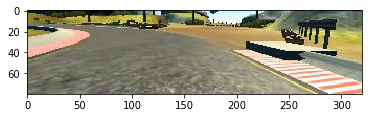

cropped shape: (80, 320, 3)


In [53]:
# See how the Cropping goes.
print('shape:', img.shape )

# In keras pipelin: model.add(Cropping2D(cropping=((50, 30), (0, 0)), input_shape = (row, col, ch) ) )
# Could be less error prone if we can use the same function, or parameter.
cropped = img[50 : img.shape[0] - 30, 0 : img.shape[1]]
plt.imshow(cropped)
plt.show()
print('cropped shape:', cropped.shape )


(160, 320, 3)
(160, 320)
(160, 320, 1)
<class 'numpy.ndarray'>


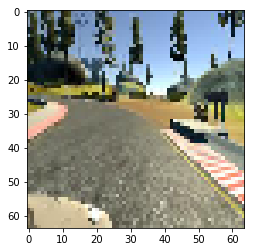

In [54]:
# resized 64 x 64.

from model import resize_img

print(img.shape)
new_img = img[:,:,0]
print(new_img.shape)
new_img = new_img.reshape(new_img.shape[0], new_img.shape[1], 1)
print(new_img.shape)
#resized = resize_img(new_img)
#print(resized)
#print(type(resized) )
#resized = resize_img(img)

# I really don't like the fact that I don't know how to use the same function used in kears.
resized = cv2.resize(img, (64, 64))
print(type(resized) )
plt.imshow(resized)


name :  ./pics/left_2016_12_01_13_31_13_786.jpg


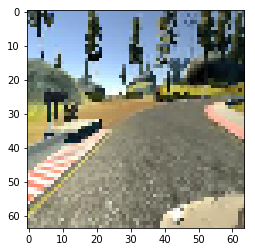

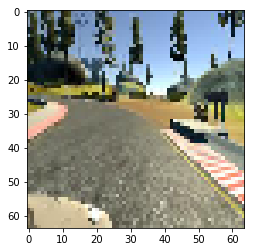

In [55]:
# flipping horizontally.

from model import flip_50_percent_image

#center_2016_12_01_13_31_13_786.jpg
#left_2016_12_01_13_31_13_786.jpg
#right_2016_12_01_13_31_13_786.jpg
left = 'left_2016_12_01_13_31_13_786.jpg'
name = './pics/' + left.strip().split('\\')[-1]
print('name : ', name)

#img, angle = read_image(name, 0, columnIdx.left.value)
#
flipped, angle = flip_50_percent_image(resized, 0, 1)
#print(img)
plt.imshow(flipped)
plt.show()

flipped, angle = flip_50_percent_image(resized, 0, 2)
plt.imshow(flipped)
plt.show()



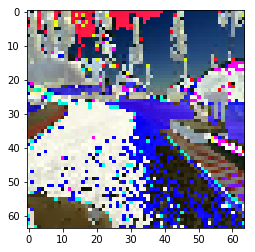

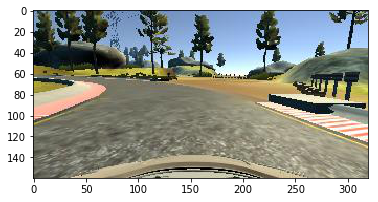

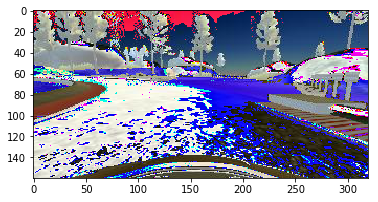

In [64]:
# normalization
#model.add(Lambda(lambda x:x / 255.0 - 0.5, input_shape = (row, col, ch) ) )
#print(flipped)
normalized = flipped / 255.0 - 0.5
plt.imshow(normalized)
plt.show()


center = 'center_2016_12_01_13_31_13_786.jpg'
name = './pics/' + center.strip().split('\\')[-1]
img, angle = read_image(name, angle, columnIdx.right.value)
plt.imshow(img)
plt.show()


normalized = img / 255.0 - 0.5
plt.imshow(normalized)
plt.show()


In [57]:
df = pd.DataFrame(samples)
# drop the column name.
df = df.drop(df.index[0] )
#print(df[columnIdx.steering.value])


columnIdx.steering:  3


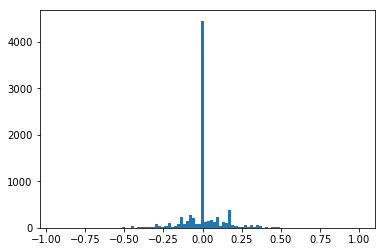

In [58]:
#df[3].astype(float).hist()
print('columnIdx.steering: ', columnIdx.steering.value)
df3 = df[columnIdx.steering.value].astype(float)
ax = df3.hist(bins = 100)
ax.grid(False)


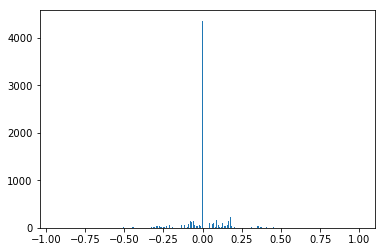

In [59]:
ax = df3.hist(bins = 500)
ax.grid(False)


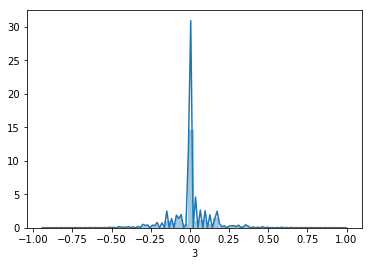

In [60]:
sns.distplot(df3)


In [61]:


need a image of resize image here.





SyntaxError: invalid syntax (<ipython-input-61-49432d3fd03c>, line 3)